In [1]:
#utilizando o relatório que é enviado com nome de Historico Cancelamento.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
sns.set_palette("Set1")

In [4]:
data = pd.read_csv('selfit/hist-canc.csv', sep = ',')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   contrato             318269 non-null  int64 
 1   datacancelamento     318269 non-null  object
 2   tipocancelamento     318269 non-null  object
 3   plano                318269 non-null  object
 4   cliente              318269 non-null  object
 5   cpf                  318191 non-null  object
 6   sexo                 318269 non-null  object
 7   idadecliente         318269 non-null  int64 
 8   telefonescliente     318246 non-null  object
 9   emailscliente        318248 non-null  object
 10  qtdediaspermanencia  318269 non-null  int64 
 11  nomeunidade          318269 non-null  object
 12  estadounidade        318269 non-null  object
 13  cidadeunidade        318269 non-null  object
 14  dataultimoacesso     246136 non-null  object
dtypes: int64(3), object(12)
memory usa

In [6]:
data.head()

,contrato,datacancelamento,tipocancelamento,plano,cliente,cpf,sexo,idadecliente,telefonescliente,emailscliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade,dataultimoacesso
0,1066698,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ALEXANDRE MAURICIO NUNES DE BARROS,859.234.325-95,MASCULINO,24,(71)996859279,alexandremauricio8@hotmail.com,120,RIO VERMELHO,BAHIA,SALVADOR,2020-01-07 21:03:15.225
1,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
2,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
3,1134727,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,DIEGO HENRIQUE LINS SILVA,032.086.065-59,MASCULINO,33,(87)999499080,diego025@outlook.com,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA,2021-07-06 16:48:04.109
4,975901,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ERICA MENDES DOS SANTOS,400.766.978-35,FEMININO,30,(14)997716746,mendes.erica.santos@gmail.com,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA,2020-12-19 10:09:18.547


<b><h3> Limpeza do Dataset</h3></b>

In [7]:
data.drop(['contrato','cliente', 'cpf', 'telefonescliente', 'emailscliente', 'dataultimoacesso'],
          axis =1,
          inplace = True)

In [8]:
data.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade
0,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR
1,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
2,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
3,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA
4,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA


In [9]:
data.isnull().sum()

datacancelamento       0
tipocancelamento       0
plano                  0
sexo                   0
idadecliente           0
qtdediaspermanencia    0
nomeunidade            0
estadounidade          0
cidadeunidade          0
dtype: int64

In [10]:
data.dtypes

datacancelamento       object
tipocancelamento       object
plano                  object
sexo                   object
idadecliente            int64
qtdediaspermanencia     int64
nomeunidade            object
estadounidade          object
cidadeunidade          object
dtype: object

**Ajustando datas**

In [11]:
#datas para datetime.
data['datacancelamento'] = data['datacancelamento'] = pd.to_datetime(data['datacancelamento'], format='%Y-%m-%d')

In [12]:
# cria uma coluna chamada 'mes' e coloca o mês da tabela naquela coluna kkk
data['mes'] = data['datacancelamento'].dt.month

Ajustando dias de permanência

In [13]:
data = data.loc[(data.qtdediaspermanencia >= 0)]

Ajustando idade dos clientes.

In [14]:
data = data.loc[(data.idadecliente > 10 ) & (data.idadecliente < 70)]

Ajustando Sexo

In [15]:
data = data.loc[(data.sexo != 'NAO INFORMADO')]

Removendo tipos de plano que sejam irrelevantes em quesito "peso de dados" 

In [16]:
data['plano'].value_counts()

PLANO SELF LIGHT                 89294
PLANO SELF PLUS SITE             83690
PLANO SELF LIGHT SITE            71701
PLANO SELF PLUS                  52494
PLANO PLUS CORP                   3503
PLANO SELF LIGHT MENSAL            208
PLANO SELF LIGHT TOTAL             178
PLANO SELF PLUS TOTAL              145
PLANO ACOLHEDOR PLUS               105
PLANO SELF PLUS MENSAL              83
CORTESIA MENSAL LIGHT COVID19       39
PLANO CORTESIA PLUS                 36
PLANO EMBAIXADOR PLUS               27
CORTESIA MENSAL PLUS COVID19        24
DAY USE                              7
PLANO SELF LIGHT TESTE-SITE          2
Name: plano, dtype: int64

In [17]:

data = data.loc[(data.plano != 'PLANO SELF LIGHT TESTE-SITE') & 
                  (data.plano != 'CORTESIA MENSAL PLUS COVID19') &
                  (data.plano != 'DAY USE') &
                  (data.plano != 'CORTESIA MENSAL LIGHT COVID19') &
                  (data.plano != 'PLANO EMBAIXADOR PLUS') &
                  (data.plano != 'PLANO CORTESIA PLUS') &
                  (data.plano != 'PLANO SELF PLUS MENSAL') &
                  (data.plano != 'PLANO ACOLHEDOR PLUS') &
                  (data.plano != 'PLANO SELF LIGHT MENSAL') &
                  (data.plano != 'PLANO SELF LIGHT TOTAL') &
                  (data.plano != 'PLANO SELF PLUS TOTAL') &
                  (data.plano != 'PLANO PLUS CORP')]

In [18]:
data['plano'].value_counts()

PLANO SELF LIGHT         89294
PLANO SELF PLUS SITE     83690
PLANO SELF LIGHT SITE    71701
PLANO SELF PLUS          52494
Name: plano, dtype: int64

Removendo unidades que fecharam:

In [19]:
pd.crosstab([data.estadounidade ,data.cidadeunidade, data.nomeunidade],
            [ data.mes],
            margins = False).style.background_gradient(cmap = 'RdYlGn')

Unidades fechadas (considerando baixa densidade de cancelamento em alguns meses):

1) CABULA
2) GRAÇA
3) MATATU
4) PITUBA I
5) TURU
6) JARDIM DAS AMÉRICAS
7) POWER CENTERMINAS
8) BOA VIAGEM II
9) PARTAGE
10) INDEPENDENCIA
11) AQUÁRIUS
12) LIMÃO
13) SANTA CLARA



In [20]:
#removendo do dataset as linhas que contém essas unidades.
data = data.loc[(data.nomeunidade != 'CABULA') &
                (data.nomeunidade != 'GRAÇA') &
                (data.nomeunidade != 'MATATU') &
                (data.nomeunidade != 'PITUBA I') &
                (data.nomeunidade != 'TURU') &
                (data.nomeunidade != 'JARDIM DAS AMÉRICAS') &
                (data.nomeunidade != 'POWER CENTERMINAS') &
                (data.nomeunidade != 'BOA VIAGEM II') &
                (data.nomeunidade != 'PARTAGE') &
                (data.nomeunidade != 'INDEPENDENCIA') &
                (data.nomeunidade != 'AQUÁRIUS') &
                (data.nomeunidade != 'LIMÃO') &
                (data.nomeunidade != 'SANTA CLARA')]

In [21]:
pd.crosstab([data.estadounidade ,data.cidadeunidade, data.nomeunidade],
            [ data.mes],
            margins = False).style.background_gradient(cmap = 'RdYlGn')

In [22]:
data.nomeunidade.value_counts()

PARALELA                 7976
ESTAÇÃO CUIABÁ           7789
PRESIDENTE KENNEDY       7715
PRESIDENTE VARGAS        7170
PARQUE SHOPPING BELEM    6924
                         ... 
LAR CENTER               1991
CONDE DE BONFIM          1759
BARÃO DE ITAMBI          1225
ARAPANÉS                 1099
FREEWAY                  1031
Name: nomeunidade, Length: 62, dtype: int64

Separando por Regioes do Brasil em int.

NORTE = 1

NORDESTE = 2

CENTROESTE = 3

SUDESTE = 4 

SUL = 5



In [23]:
data.estadounidade.value_counts()

BAHIA                  54094
SÃO PAULO              47396
CEARÁ                  28115
PERNAMBUCO             26480
PARÁ                   21857
PARAÍBA                19136
MARANHÃO               16149
PIAUÍ                  13988
ALAGOAS                13516
RIO DE JANEIRO          9513
RIO GRANDE DO NORTE     9105
MATO GROSSO             7789
AMAZONAS                6826
SERGIPE                 4636
MINAS GERAIS            2200
Name: estadounidade, dtype: int64

In [24]:
data['regiaounidade'] = 0
# (data.estadounidade == '') |
data.loc[(data.estadounidade == 'ACRE') | (data.estadounidade == 'AMAPÁ') | (data.estadounidade == 'AMAZONAS') | (data.estadounidade == 'PARÁ') | (data.estadounidade == 'RONDÔNIA') | (data.estadounidade == 'RORAIMA') | (data.estadounidade == 'TOCANTINS') , 'regiaounidade'] = 1
data.loc[(data.estadounidade == 'ALAGOAS') | (data.estadounidade == 'BAHIA') | (data.estadounidade == 'CEARÁ') | (data.estadounidade == 'MARANHÃO') | (data.estadounidade == 'PARAÍBA') | (data.estadounidade == 'PERNAMBUCO') | (data.estadounidade == 'PIAUÍ') | (data.estadounidade == 'RIO GRANDE DO NORTE') | (data.estadounidade == 'SERGIPE') , 'regiaounidade'] = 2
data.loc[(data.estadounidade == 'MATO GROSSO') | (data.estadounidade == 'MATO GROSSO DO SUL') | (data.estadounidade == 'GOIÁS') , 'regiaounidade'] = 3
data.loc[(data.estadounidade == 'ESPÍRITO SANTO') | (data.estadounidade == 'MINAS GERAIS') | (data.estadounidade == 'RIO DE JANEIRO') | (data.estadounidade == 'SÃO PAULO'), 'regiaounidade' ] = 4
data.loc[(data.estadounidade == 'PARANÁ') | (data.estadounidade == 'RIO GRANDE DO SUL') | (data.estadounidade == 'SANTA CATARINA'), 'regiaounidade' ] = 5

In [25]:
data.regiaounidade.value_counts()

2    185219
4     59109
1     28683
3      7789
Name: regiaounidade, dtype: int64

<h1><b> EDA </h1></b>

<b><h3> Sexo -> Variavel Categorica <h3/></b>

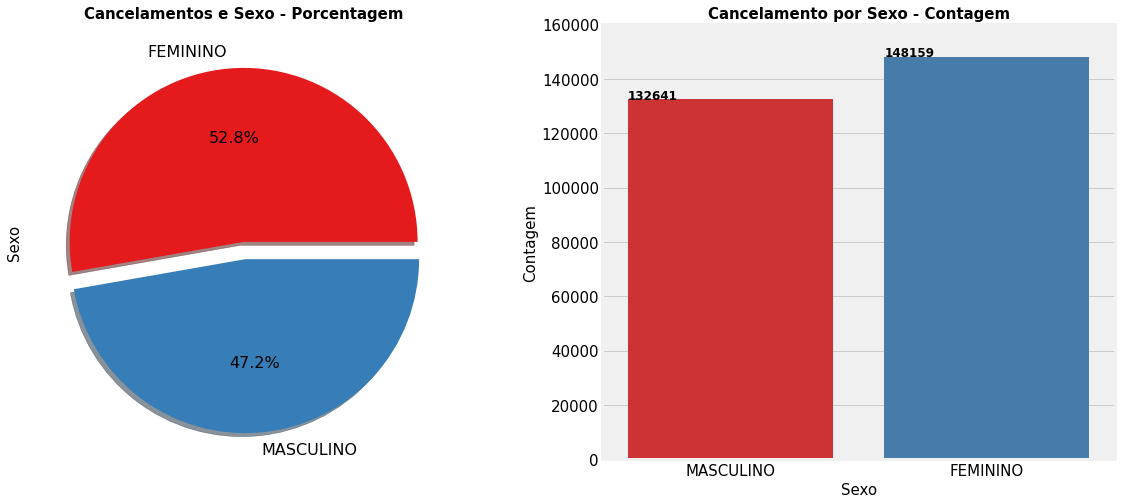

In [26]:
f, ax = plt.subplots(1,2, figsize = (18,8))
#Grafico 1
data['sexo'].value_counts().plot.pie(
    explode = [0,0.1], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        ax = ax[0], #indica onde será plotado a figura, na coluna 1.
                                        shadow = True,
                                        fontsize = 16                         
)
ax[0].set_title("Cancelamentos e Sexo - Porcentagem", fontsize = 15, fontweight = 'bold')
ax[0].set_ylabel("Sexo", fontsize =15)

#Grafico 2
b = sns.countplot('sexo',
              data = data,
              ax = ax[1],
              )
b.tick_params(labelsize= 15)
b.set_yticks(range(0,180000, 20000))
ax[1].set_title("Cancelamento por Sexo - Contagem", fontsize = 15, fontweight = 'bold')
ax[1].set_ylabel("Contagem", fontsize = 15)
ax[1].set_xlabel("Sexo", fontsize = 15)
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 1)),
            fontsize=12,
            color='black',
           weight = 'bold')

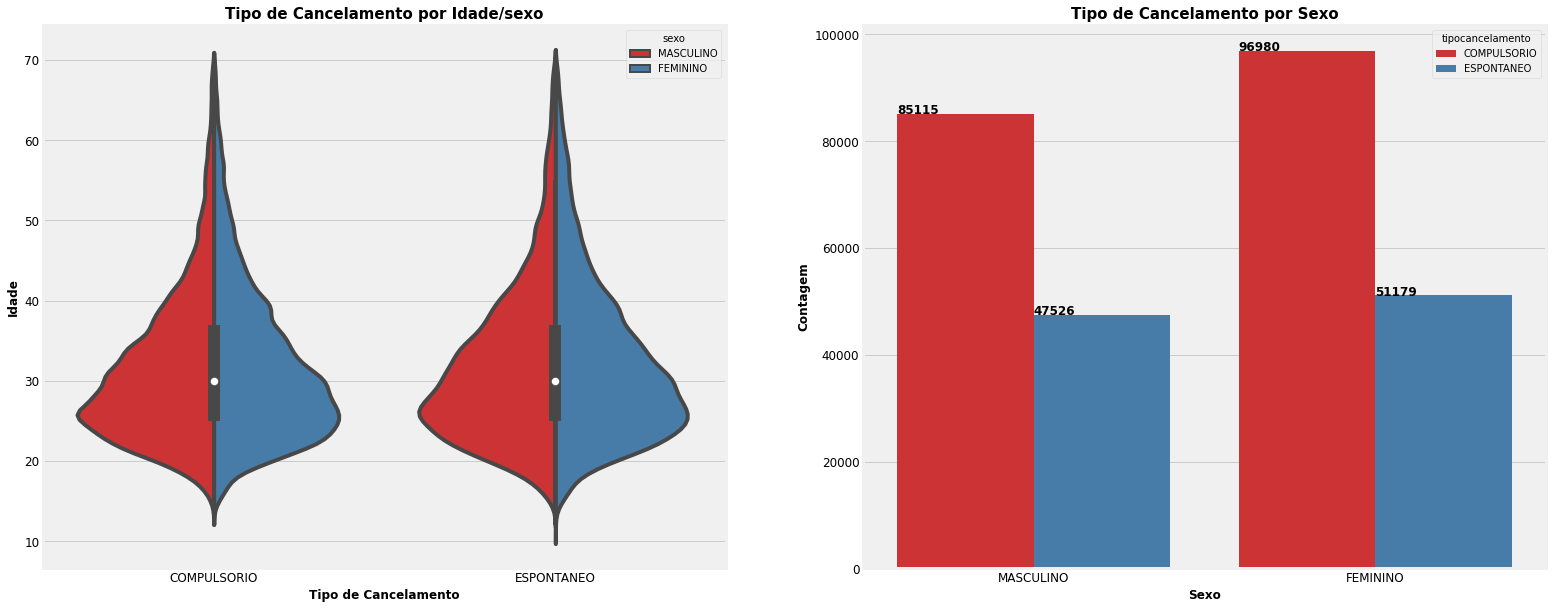

In [27]:
f, ax = plt.subplots(1, 2, figsize = (24,10))

sns.violinplot('tipocancelamento',
               'idadecliente',
               hue = 'sexo',
               split = True,
               data = data,
               ax = ax[0])
ax[0].set_title("Tipo de Cancelamento por Idade/sexo", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Tipo de Cancelamento", fontsize = 12, fontweight = 'bold')
ax[0].set_ylabel("Idade", fontsize = 12, fontweight = 'bold')
ax[0].tick_params(labelsize =12)


sns.countplot('sexo',
              hue = 'tipocancelamento',
              data = data,
              ax = ax[1])

ax[1].set_title("Tipo de Cancelamento por Sexo", fontsize = 15, fontweight = 'bold')
ax[1].set_ylabel("Contagem", fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel("Sexo", fontsize = 12, fontweight = 'bold')
ax[1].tick_params(labelsize =12)
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 1)),
            fontsize=12,
            color='black',
           weight = 'bold')


Sexo e tipocancelamento são indiferentes quando observados com uma massa grande, porém, podemos perceber levemente que o **ViolinPlot** possui menor afunilamento no topo para o sexo feminino, dizendo que as mulheres tem maior presença nas academias conforme a idade aumenta.

Filtrando por grupos de idade

In [28]:
data_idade_20_30 = data.loc[(data.idadecliente >= 20) & (data.idadecliente <= 30)]
data_idade_30_40 = data.loc[(data.idadecliente > 30) & (data.idadecliente <= 40)]
data_idade_40_60 = data.loc[(data.idadecliente > 40) & (data.idadecliente <= 60)]
#total
data_idade_20_60 = data.loc[(data.idadecliente >= 20) & (data.idadecliente <= 60)]

Vamos dar um Zoom na figura para idades de 40 a 60 anos..

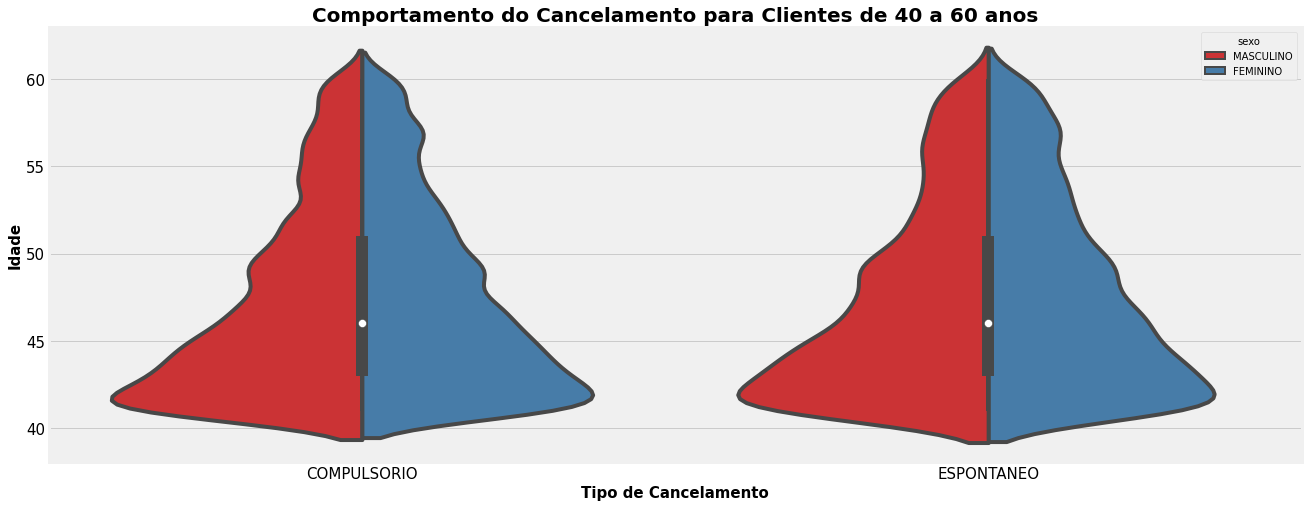

In [29]:
fig = sns.violinplot('tipocancelamento', 
               'idadecliente',
               hue = 'sexo',
               data = data_idade_40_60,
               split = True,
               )

fig.set_title("Comportamento do Cancelamento para Clientes de 40 a 60 anos", fontsize = 20, fontweight ='bold')
fig.set_xlabel("Tipo de Cancelamento", fontsize = 15, fontweight ='bold')
fig.set_ylabel("Idade", fontsize = 15, fontweight ='bold')
fig.tick_params(labelsize =15)

fig = plt.gcf()
fig.set_size_inches(20,8)

Analisando de outra maneira..

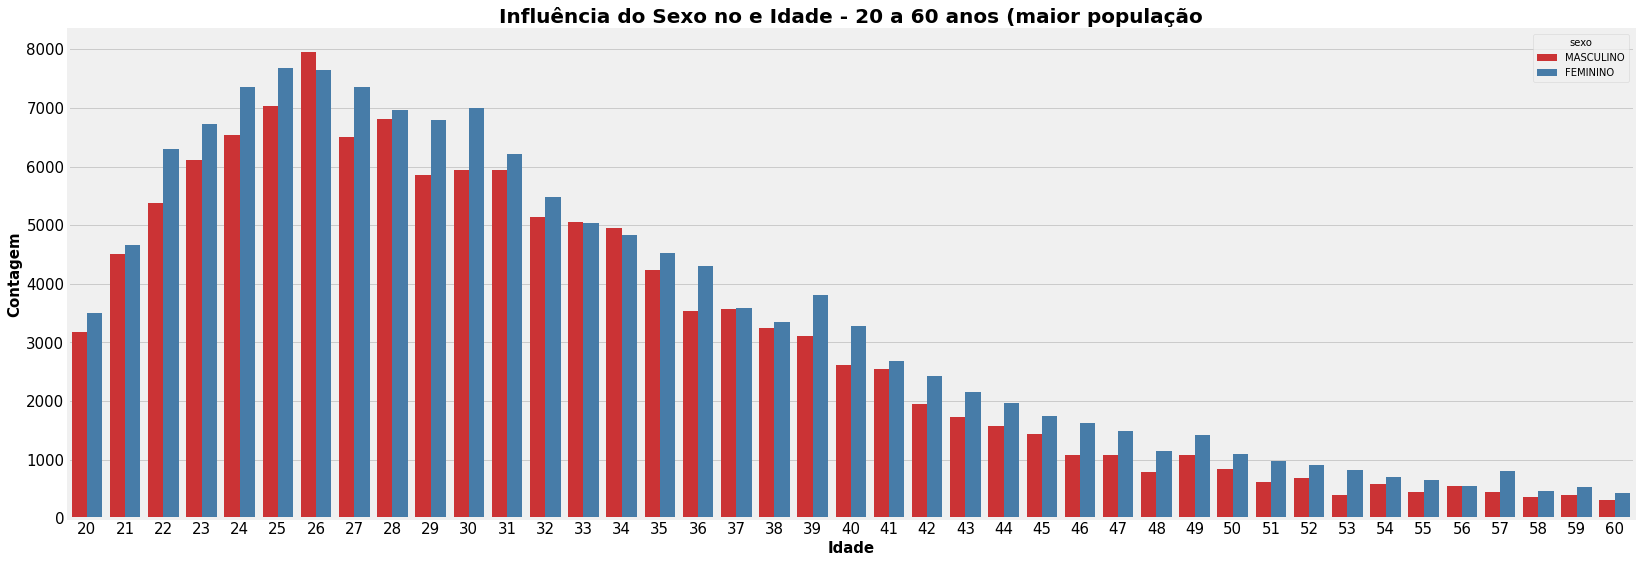

In [30]:
fig = sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_20_60)
fig.set_title("Influência do Sexo no e Idade - 20 a 60 anos (maior população", fontsize = 20, fontweight ='bold')
fig.set_xlabel("Idade", fontsize = 15, fontweight ='bold')
fig.set_ylabel("Contagem", fontsize = 15, fontweight ='bold')
fig.tick_params(labelsize =15)
    
plt.gcf().set_size_inches(25,9)

Aplicando zoom das idades de 20 a 40 e depois de 41 a 60, temos:

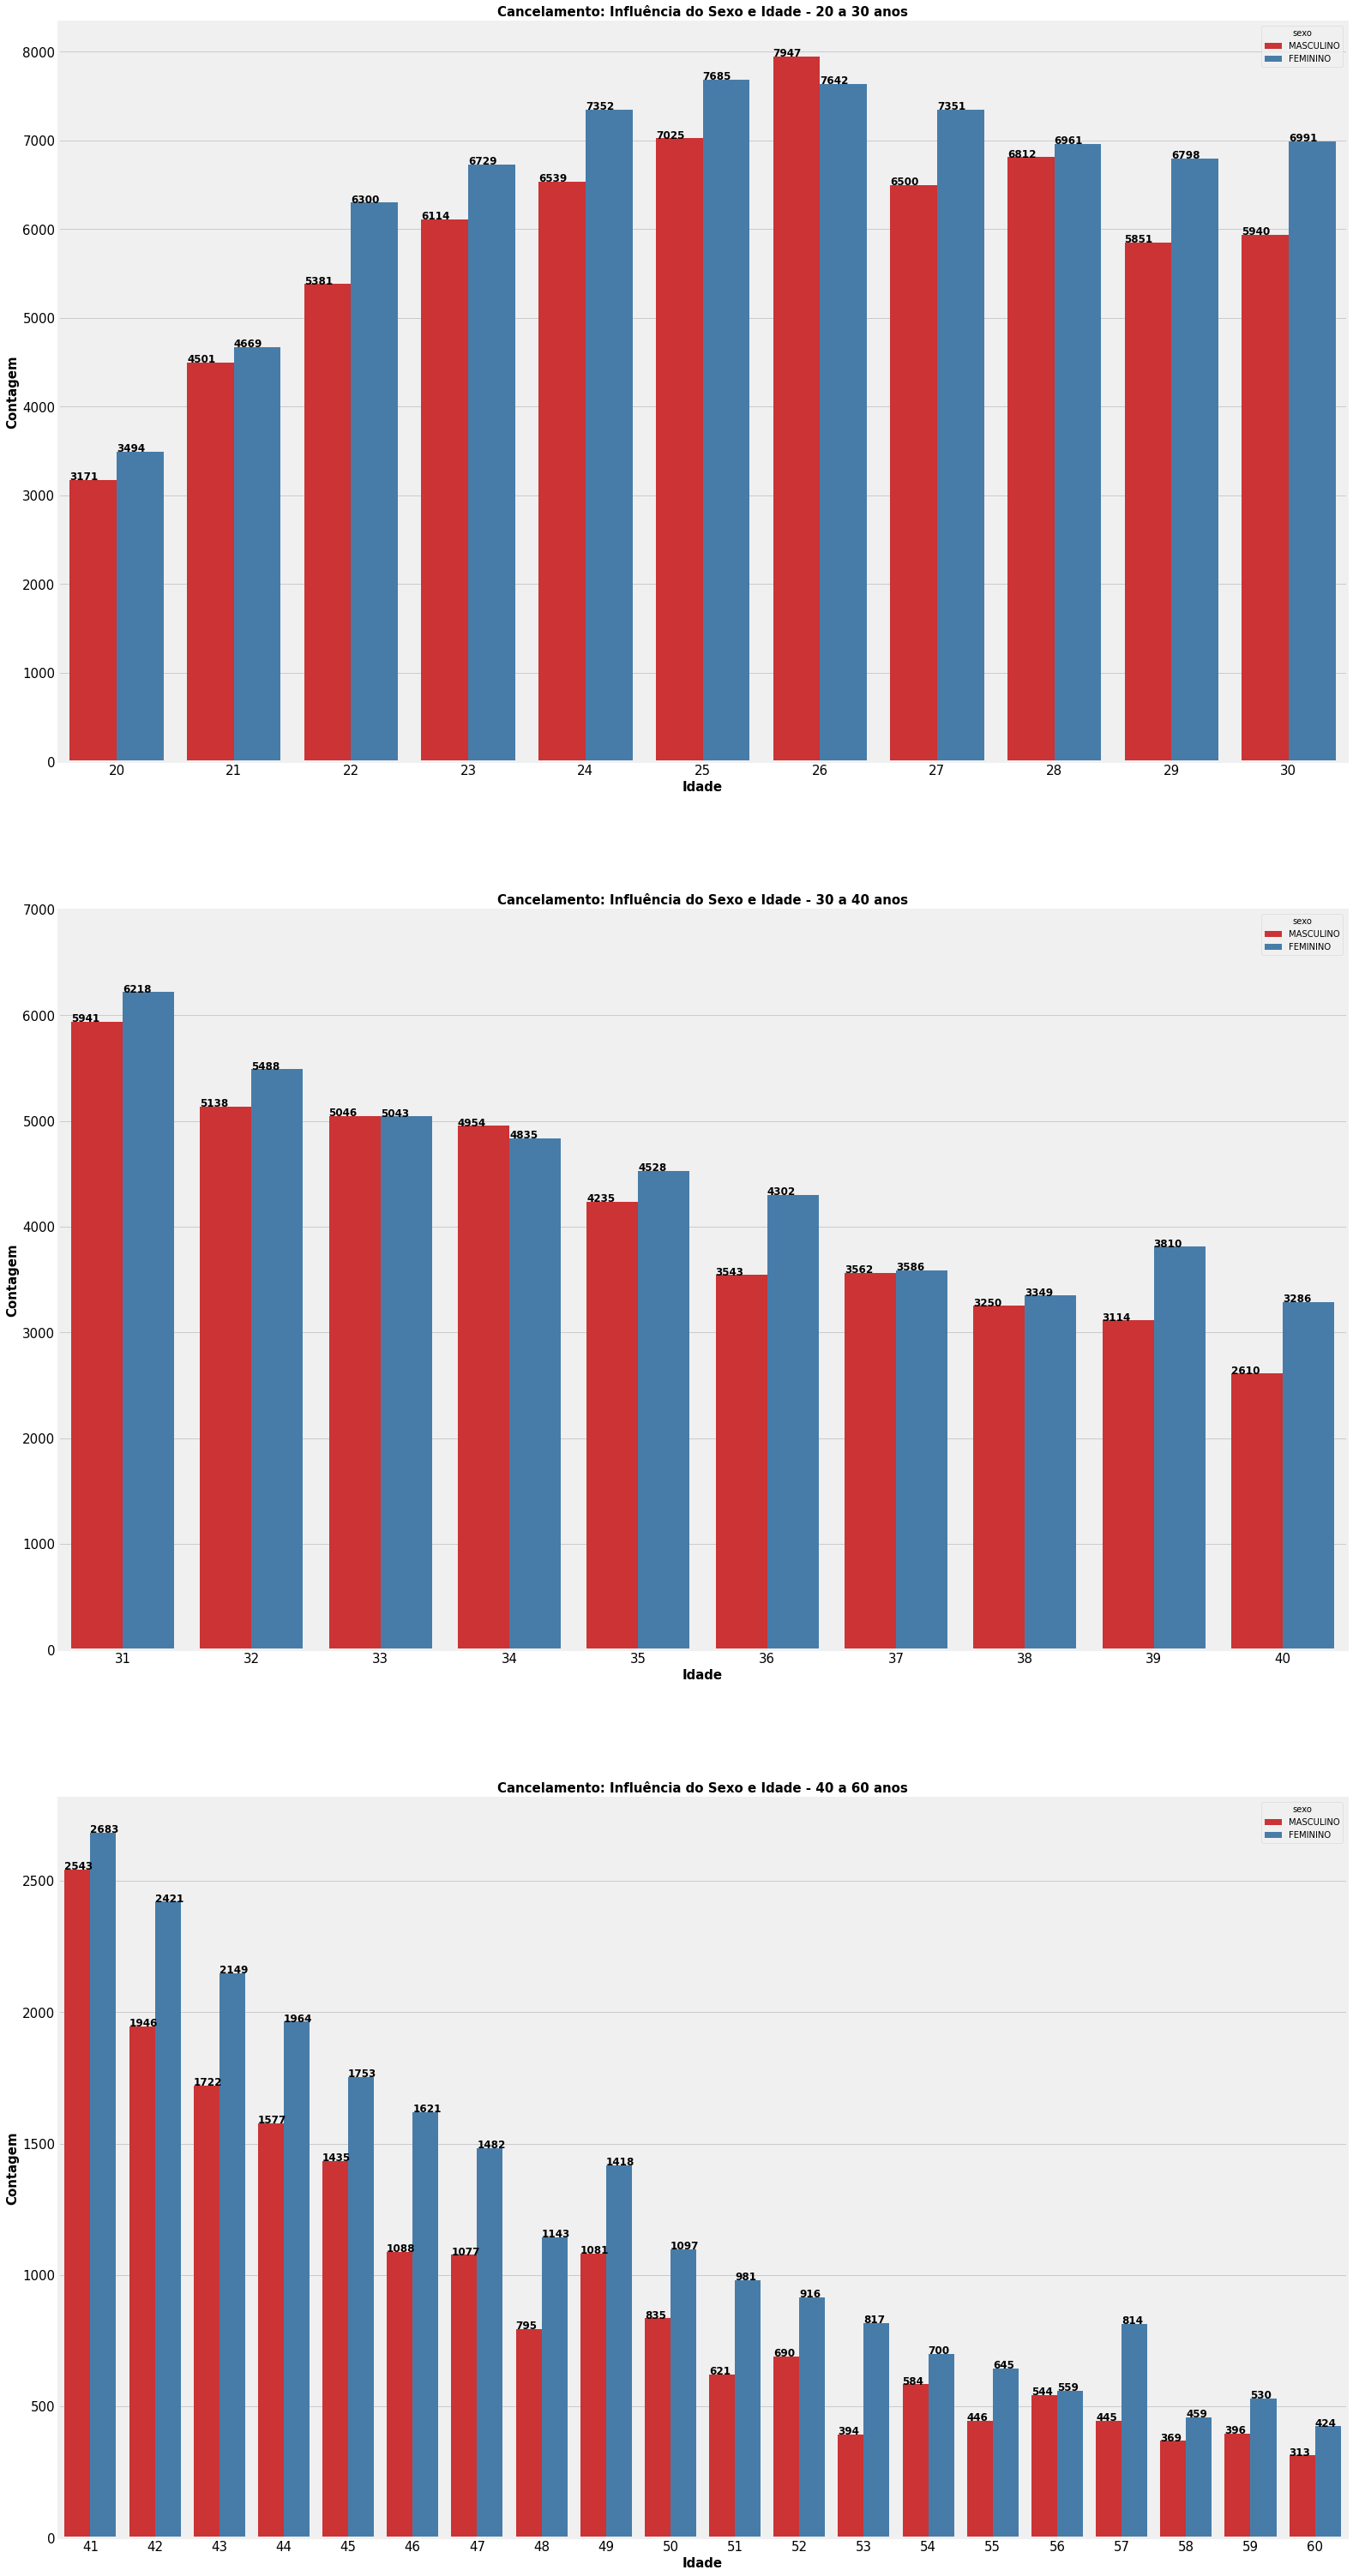

In [31]:
f, ax = plt.subplots(3,1, figsize = (24,54))
#figura 1
sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_20_30,
              ax = ax[0])
ax[0].set_yticks(range(0,9000, 1000))
for i in ax[0].patches:
    ax[0].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')
    
ax[0].set_title("Cancelamento: Influência do Sexo e Idade - 20 a 30 anos", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Idade", fontsize = 15, fontweight ='bold')
ax[0].set_ylabel("Contagem", fontsize = 15, fontweight ='bold')
ax[0].tick_params(labelsize =15)

#figura 2
sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_30_40,
              ax = ax[1])

ax[1].set_yticks(range(0,8000, 1000))
for i in ax[1].patches:
    ax[1].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')

ax[1].set_title("Cancelamento: Influência do Sexo e Idade - 30 a 40 anos", fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel("Idade", fontsize = 15, fontweight ='bold')
ax[1].set_ylabel("Contagem", fontsize = 15, fontweight ='bold')
ax[1].tick_params(labelsize =15)
#figura 3
sns.countplot('idadecliente',
            hue = 'sexo',
            data = data_idade_40_60,
            ax = ax[2])

for i in ax[2].patches:
    ax[2].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')
    
ax[2].set_title("Cancelamento: Influência do Sexo e Idade - 40 a 60 anos", fontsize = 15, fontweight = 'bold')
ax[2].set_xlabel("Idade", fontsize = 15, fontweight ='bold')
ax[2].set_ylabel("Contagem", fontsize = 15, fontweight ='bold')
ax[2].tick_params(labelsize =15)


plt.show()

Quando aplicamos zoom no gráfico, podemos que a hipótese acima é válida, pois temos:

1) **de 20 a 30 anos:** Para cada idade, mulheres têm predominância de cerca de 10% a mais para cada idade.
2) **de 30 a 40 anos:** A predominância de mulheres nessa idade é também cerca de 10%, porem chegando perto dos 40 anos (39 e 40) tem os maiores valores, chegando a 20% de predominância feminina.
3) **40 a 60 anos:** A predominância feminina é ainda maior, chegando a 30% média, com resultados de 44% na idade de 57 anos.



<b><h3>Plano -> Variável Categórica</h3></b>


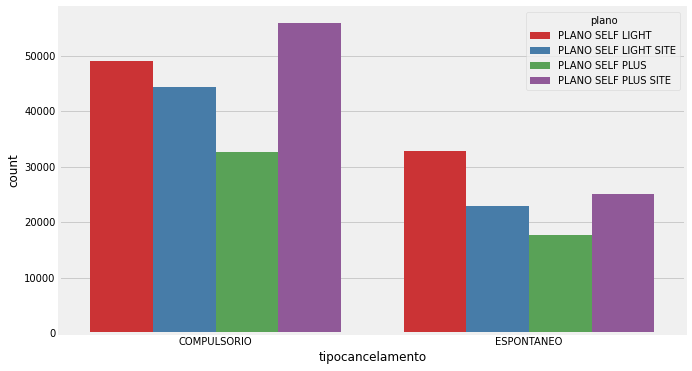

In [32]:
sns.countplot("tipocancelamento",
              hue = "plano",
              data = data)

fig = plt.gcf()

fig.set_size_inches(10,6)

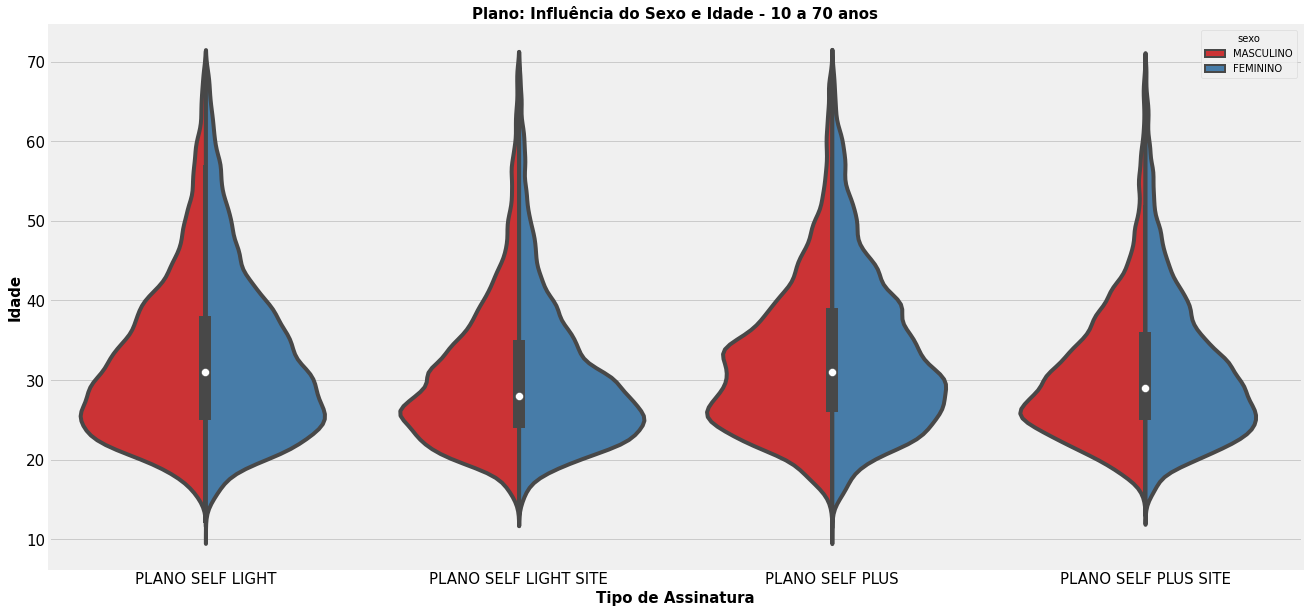

In [33]:
fig = sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               split = True,
               data = data)

fig.set_title("Plano: Influência do Sexo e Idade - 10 a 70 anos", fontsize = 15, fontweight = 'bold')
fig.set_xlabel("Tipo de Assinatura", fontsize = 15, fontweight ='bold')
fig.set_ylabel("Idade", fontsize = 15, fontweight ='bold')
fig.tick_params(labelsize =15)

fig = plt.gcf()

fig.set_size_inches(20,10)

Quando separamos por plano, as coisas ficam mais interessantes. Podemos observar comportamentos diferentes para cada um dos planos.

1) Planos vindos do **Site** são assinados por uma população mais jovem **"20-30 anos"**, enquanto planos feitos no **Balcão** são assinados por uma gama maior de idade, que encobre dos **20-30** em maioria, mas caindo levemente nos **30-40**.

2) Mulheres ainda tem pico do violino maior do que os homens.

Juntando os Canais **Online** e **Balcão (Presencial)**

Juntando os tipos de plano indiferente dos canais: **Plano Plus** e **Plano Light**

In [34]:
data_plano_site = data.loc[(data.plano == 'PLANO SELF LIGHT SITE') | (data.plano == 'PLANO SELF PLUS SITE')]
data_plano_balcao = data.loc[(data.plano != 'PLANO SELF LIGHT SITE') & (data.plano != 'PLANO SELF PLUS SITE')]

In [35]:
data_plano_light = data.loc[(data.plano == 'PLANO SELF LIGHT SITE') | (data.plano == 'PLANO SELF LIGHT')]
data_plano_plus = data.loc[(data.plano != 'PLANO SELF LIGHT SITE') & (data.plano != 'PLANO SELF LIGHT')]

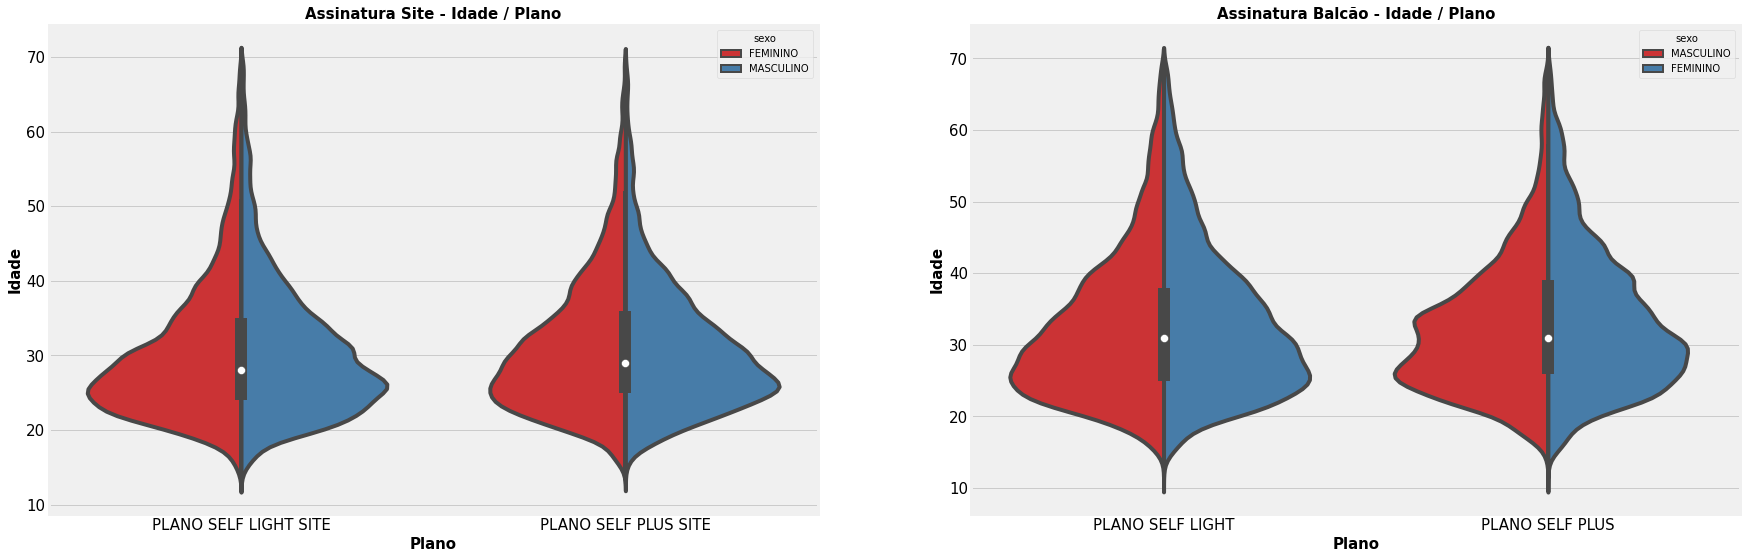

In [36]:
f, ax = plt.subplots(1,2, figsize = (27,9))

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_site,
               split = True,
               ax = ax[0])
ax[0].set_title("Assinatura Site - Idade / Plano", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[0].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[0].tick_params(labelsize =15)

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_balcao,
               split = True,
               ax = ax[1])
ax[1].set_title("Assinatura Balcão - Idade / Plano", fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[1].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[1].tick_params(labelsize =15)

plt.show()

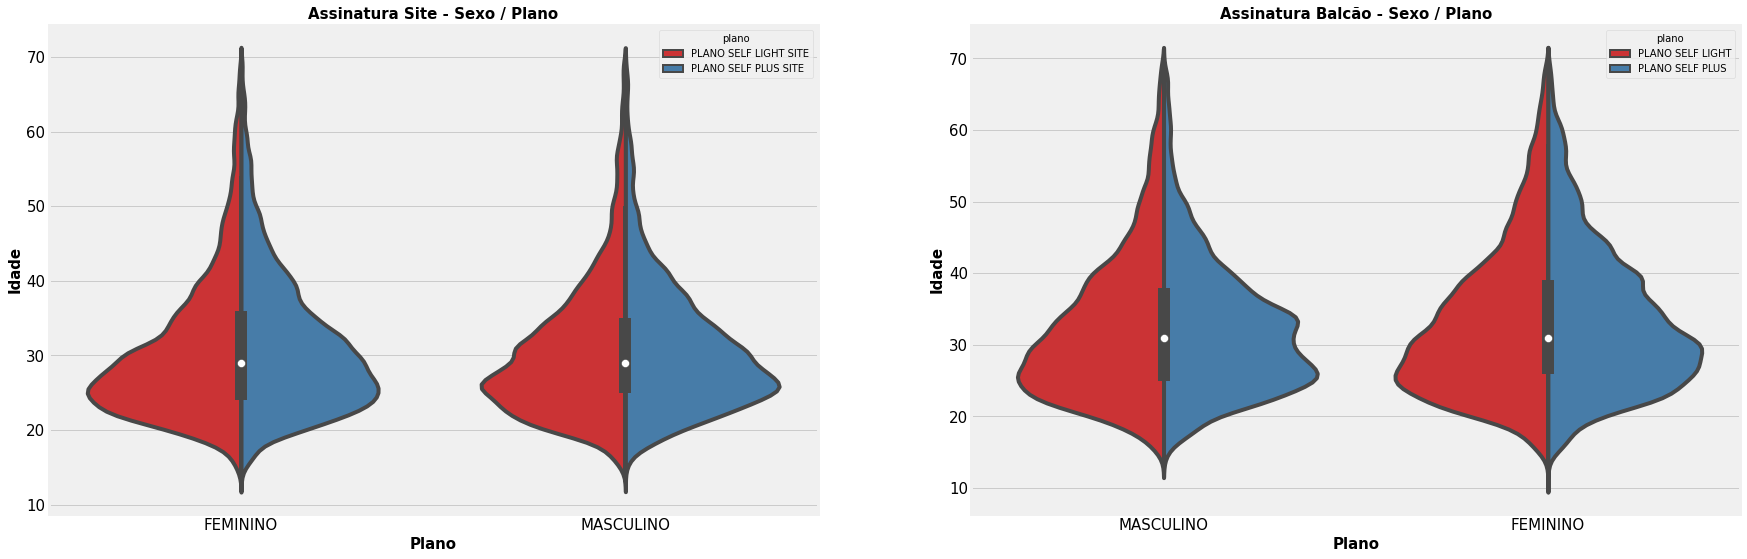

In [37]:
f, ax = plt.subplots(1,2, figsize = (27,9))

sns.violinplot('sexo',
               'idadecliente',
               hue = 'plano',
               data = data_plano_site,
               split = True,
               ax = ax[0])
ax[0].set_title("Assinatura Site - Sexo / Plano", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[0].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[0].tick_params(labelsize =15)

sns.violinplot('sexo',
               'idadecliente',
               hue = 'plano',
               data = data_plano_balcao,
               split = True,
               ax = ax[1])
ax[1].set_title("Assinatura Balcão - Sexo / Plano", fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[1].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[1].tick_params(labelsize =15)

plt.show()

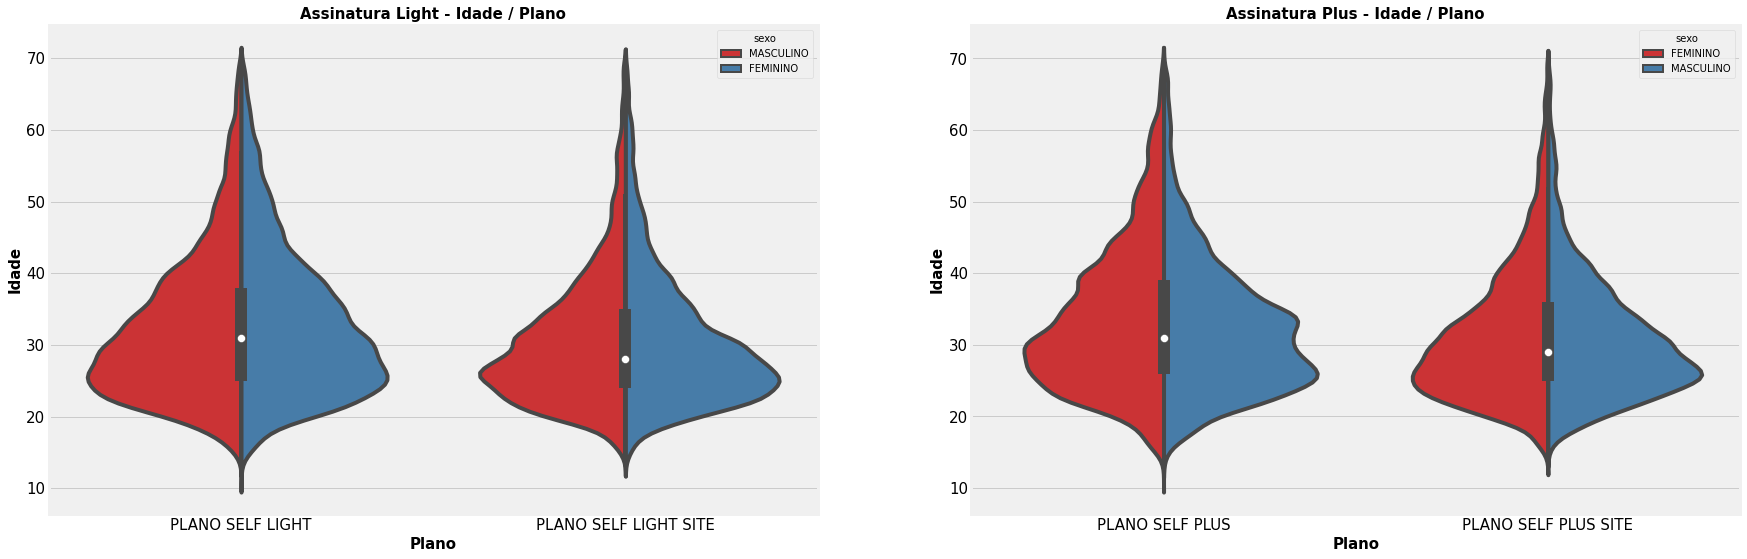

In [38]:
f, ax = plt.subplots(1,2, figsize = (27,9))

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_light,
               split = True,
               ax = ax[0])
ax[0].set_title("Assinatura Light - Idade / Plano", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[0].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[0].tick_params(labelsize =15)

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_plus,
               split = True,
               ax = ax[1])
ax[1].set_title("Assinatura Plus - Idade / Plano", fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel("Plano", fontsize = 15, fontweight ='bold')
ax[1].set_ylabel("Idade", fontsize = 15, fontweight ='bold')
ax[1].tick_params(labelsize =15)

plt.show()

<center><h1><b>TESTES!!</b></h1></center>


In [39]:
data.dtypes

datacancelamento       datetime64[ns]
tipocancelamento               object
plano                          object
sexo                           object
idadecliente                    int64
qtdediaspermanencia             int64
nomeunidade                    object
estadounidade                  object
cidadeunidade                  object
mes                             int64
regiaounidade                   int64
dtype: object

In [40]:
data_permanencia = data.loc[(data.qtdediaspermanencia >= 0) & (data.qtdediaspermanencia < 400)]

<AxesSubplot:xlabel='qtdediaspermanencia'>

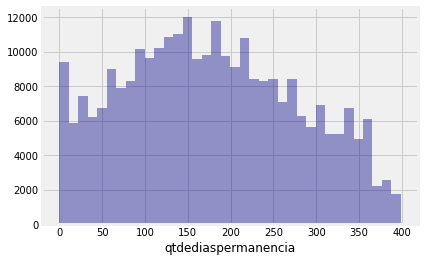

In [41]:
ax = sns.distplot(data_permanencia['qtdediaspermanencia'], hist =True, kde = False, bins = int(180/5), color = 'darkblue')

ax

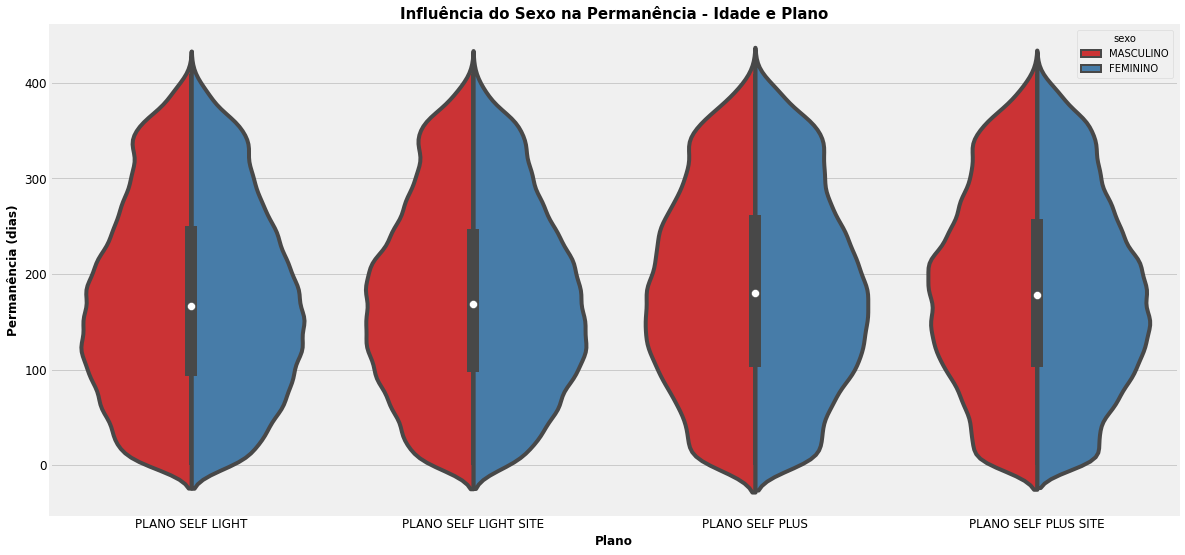

In [42]:
data_permanencia = data.loc[(data.qtdediaspermanencia >= 0) & (data.qtdediaspermanencia < 410)]

fig = sns.violinplot('plano',
               'qtdediaspermanencia',
               hue = 'sexo',
               split = True,
               data = data_permanencia)
fig.set_title("Influência do Sexo na Permanência - Idade e Plano", fontsize = 15, fontweight ='bold')
fig.set_xlabel("Plano", fontsize = 12, fontweight ='bold')
fig.set_ylabel("Permanência (dias)", fontsize = 12, fontweight = 'bold')
fig.tick_params(labelsize = 12)

plt.gcf().set_size_inches(18,9)

In [43]:
data.estadounidade.value_counts()

BAHIA                  54094
SÃO PAULO              47396
CEARÁ                  28115
PERNAMBUCO             26480
PARÁ                   21857
PARAÍBA                19136
MARANHÃO               16149
PIAUÍ                  13988
ALAGOAS                13516
RIO DE JANEIRO          9513
RIO GRANDE DO NORTE     9105
MATO GROSSO             7789
AMAZONAS                6826
SERGIPE                 4636
MINAS GERAIS            2200
Name: estadounidade, dtype: int64

In [44]:
data['regiaounidade'] = 0
# (data.estadounidade == '') |
data.loc[(data.estadounidade == 'ACRE') | (data.estadounidade == 'AMAPÁ') | (data.estadounidade == 'AMAZONAS') | (data.estadounidade == 'PARÁ') | (data.estadounidade == 'RONDÔNIA') | (data.estadounidade == 'RORAIMA') | (data.estadounidade == 'TOCANTINS') , 'regiaounidade'] = 1
data.loc[(data.estadounidade == 'ALAGOAS') | (data.estadounidade == 'BAHIA') | (data.estadounidade == 'CEARÁ') | (data.estadounidade == 'MARANHÃO') | (data.estadounidade == 'PARAÍBA') | (data.estadounidade == 'PERNAMBUCO') | (data.estadounidade == 'PIAUÍ') | (data.estadounidade == 'RIO GRANDE DO NORTE') | (data.estadounidade == 'SERGIPE') , 'regiaounidade'] = 2
data.loc[(data.estadounidade == 'MATO GROSSO') | (data.estadounidade == 'MATO GROSSO DO SUL') | (data.estadounidade == 'GOIÁS') , 'regiaounidade'] = 3
data.loc[(data.estadounidade == 'ESPÍRITO SANTO') | (data.estadounidade == 'MINAS GERAIS') | (data.estadounidade == 'RIO DE JANEIRO') | (data.estadounidade == 'SÃO PAULO'), 'regiaounidade' ] = 4
data.loc[(data.estadounidade == 'PARANÁ') | (data.estadounidade == 'RIO GRANDE DO SUL') | (data.estadounidade == 'SANTA CATARINA'), 'regiaounidade' ] = 5

In [45]:
data.regiaounidade.value_counts()

2    185219
4     59109
1     28683
3      7789
Name: regiaounidade, dtype: int64

In [46]:
#------------------------------------------------------------------------------------------------

In [47]:
data.dtypes

datacancelamento       datetime64[ns]
tipocancelamento               object
plano                          object
sexo                           object
idadecliente                    int64
qtdediaspermanencia             int64
nomeunidade                    object
estadounidade                  object
cidadeunidade                  object
mes                             int64
regiaounidade                   int64
dtype: object

In [48]:
data_regioes_brasileiras = data.copy(deep = True)
data_regioes_brasileiras

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade,mes,regiaounidade
0,2021-01-01 00:00:00.000,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR,1,2
1,2021-01-01 00:00:00.000,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,1,4
2,2021-01-01 00:00:00.000,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,1,4
3,2021-01-01 00:00:00.000,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA,1,2
4,2021-01-01 00:00:00.000,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA,1,4
...,...,...,...,...,...,...,...,...,...,...,...
318262,2021-12-31 05:01:47.408,COMPULSORIO,PLANO SELF PLUS SITE,FEMININO,52,358,SHOPPING PARANGABA,CEARÁ,FORTALEZA,12,2
318263,2021-12-31 05:02:03.732,COMPULSORIO,PLANO SELF LIGHT,FEMININO,26,353,SCOPA PLATINUM,CEARÁ,FORTALEZA,12,2
318264,2021-12-31 05:02:53.740,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,19,346,PARALELA,BAHIA,SALVADOR,12,2
318266,2021-12-31 05:03:39.872,COMPULSORIO,PLANO SELF LIGHT,FEMININO,16,91,DOM LUIS,CEARÁ,FORTALEZA,12,2


In [49]:
'''data_regioes_brasileiras.drop(['estadounidade','nomeunidade', 'cidadeunidade'],
          axis =1,
          inplace = True)'''
          
data_regioes_brasileiras.drop(['nomeunidade', 'cidadeunidade'],
          axis =1,
          inplace = True)

In [50]:
data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 4)]

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,estadounidade,mes,regiaounidade
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,SÃO PAULO,1,4
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,SÃO PAULO,1,4
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,SÃO PAULO,1,4
6,2021-01-01,ESPONTANEO,PLANO SELF LIGHT,FEMININO,22,179,SÃO PAULO,1,4
9,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,34,333,SÃO PAULO,1,4
...,...,...,...,...,...,...,...,...,...
318225,2021-12-31,COMPULSORIO,PLANO SELF PLUS SITE,FEMININO,25,347,RIO DE JANEIRO,12,4
318233,2021-12-31,ESPONTANEO,PLANO SELF PLUS SITE,FEMININO,26,317,RIO DE JANEIRO,12,4
318234,2021-12-31,ESPONTANEO,PLANO SELF PLUS SITE,FEMININO,52,126,SÃO PAULO,12,4
318235,2021-12-31,COMPULSORIO,PLANO SELF PLUS SITE,FEMININO,25,361,RIO DE JANEIRO,12,4


<AxesSubplot:xlabel='regiaounidade', ylabel='count'>

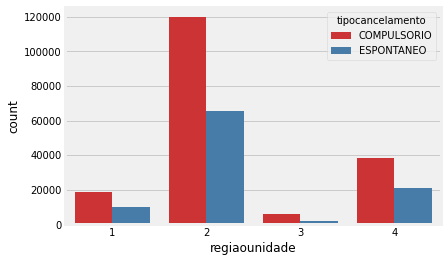

In [51]:
sns.countplot('regiaounidade', data = data_regioes_brasileiras, hue ='tipocancelamento')

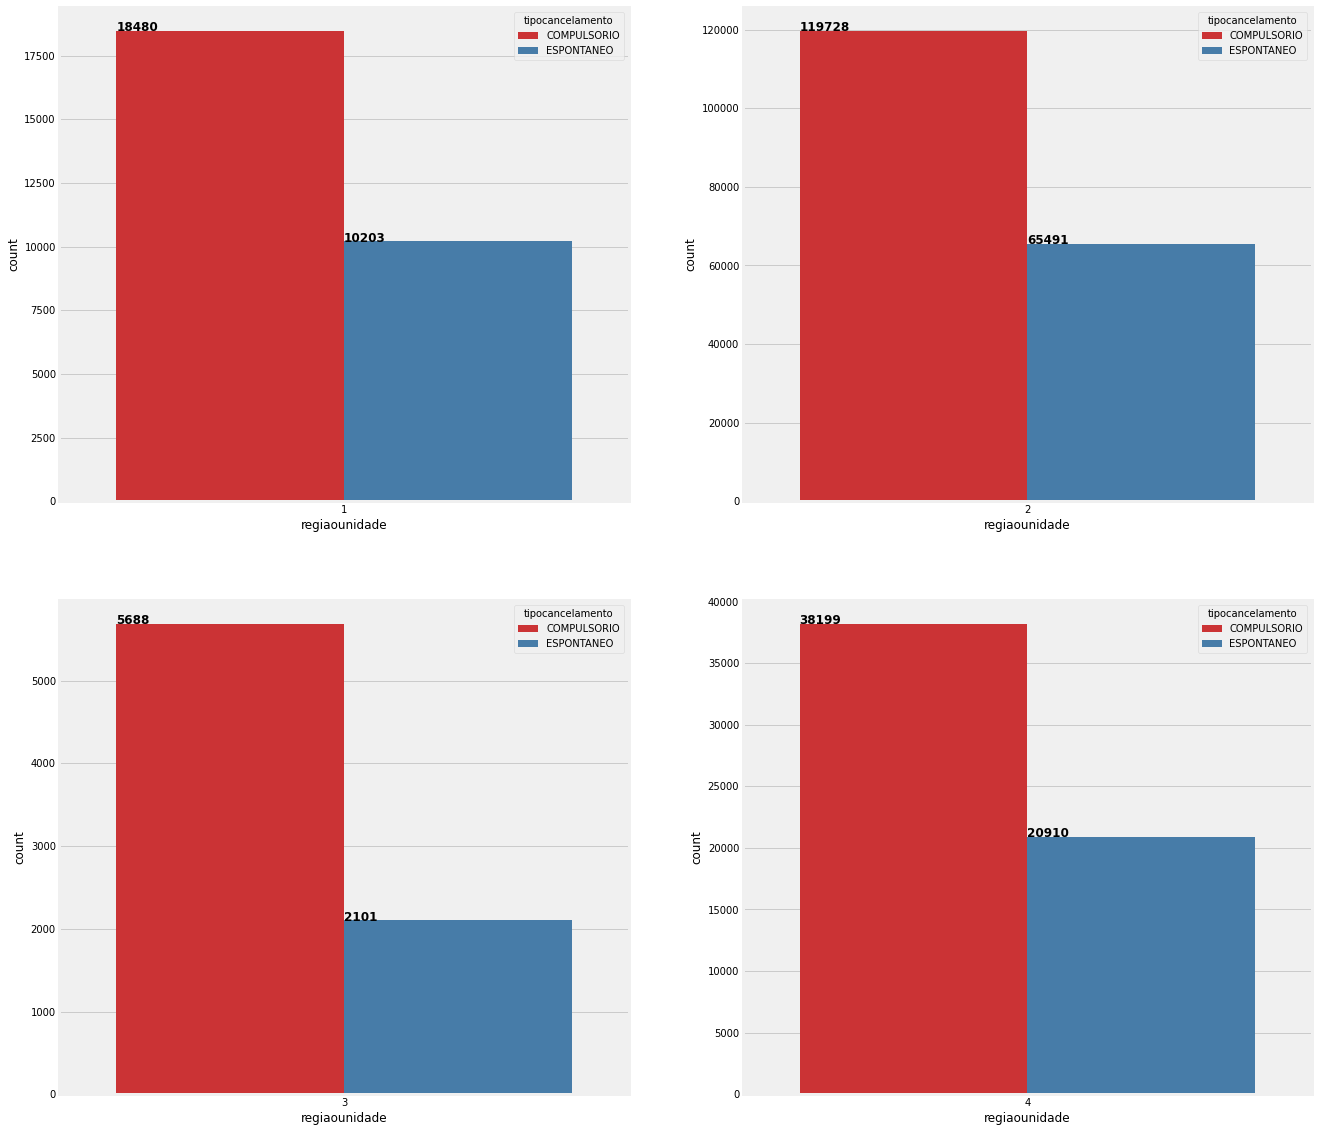

In [52]:
f, ax = plt.subplots( 2,2 , figsize = (20,20) ) 
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 1)], hue ='tipocancelamento', ax = ax[0,0])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 2)], hue ='tipocancelamento', ax = ax[0,1])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 3)], hue ='tipocancelamento', ax = ax[1,0])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 4)], hue ='tipocancelamento', ax = ax[1,1])

for i in ax[0,0].patches:
    ax[0,0].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')

for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')

for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')

for i in ax[1,1].patches:
    ax[1,1].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')


<Figure size 1296x648 with 0 Axes>

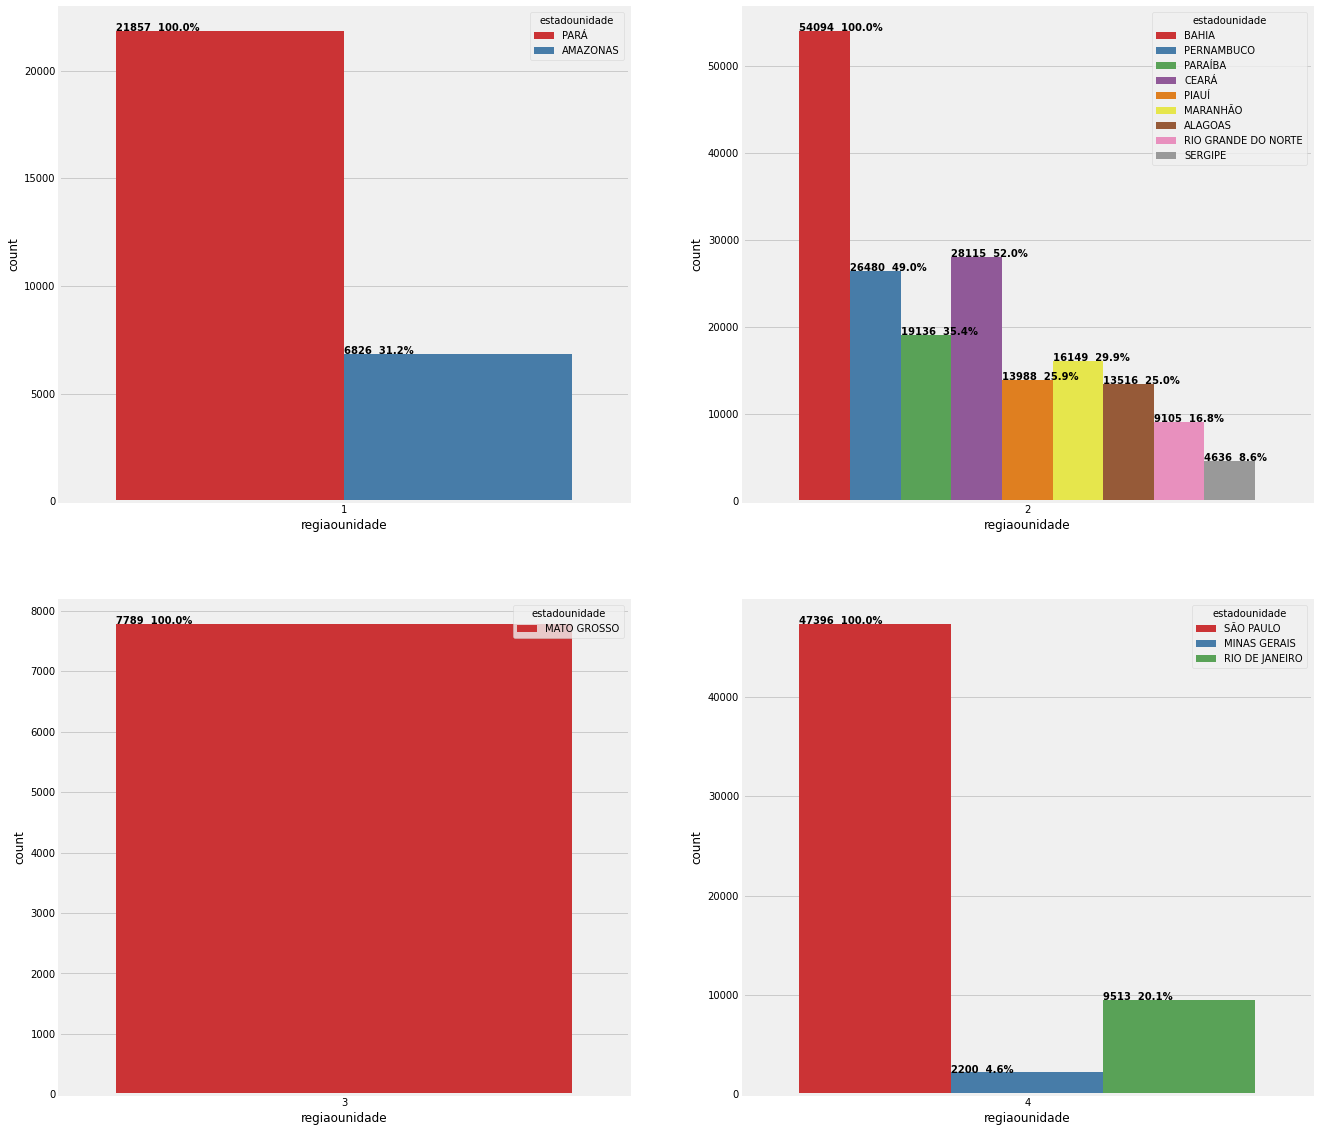

In [53]:
plt.figure(figsize = (18,9))
f, ax = plt.subplots( 2,2 , figsize = (20,20) ) 
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 1)], hue ='estadounidade', ax = ax[0,0])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 2)], hue ='estadounidade', ax = ax[0,1])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 3)], hue ='estadounidade', ax = ax[1,0])
sns.countplot('regiaounidade', data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 4)], hue ='estadounidade', ax = ax[1,1])

    
totals = []
for i in ax[0,0].patches:
    totals.append(i.get_height())
total = max(totals)
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x(), i.get_height(), \
            str(i.get_height()) +"  " + str(round((100*i.get_height()/total), 1))+'%',
            fontsize=10,
            color='black',
           weight = 'bold')    

totals = []
for i in ax[0,1].patches:
    totals.append(i.get_height())
total = max(totals)
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(), i.get_height(), \
            str(i.get_height()) +"  " + str(round((100*i.get_height()/total), 1))+'%',
            fontsize=10 ,
            color='black',
           weight = 'bold')
    
totals = []
for i in ax[1,0].patches:
    totals.append(i.get_height())
total = max(totals)
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(), i.get_height(), \
            str(i.get_height()) +"  " + str(round((100*i.get_height()/total), 1))+'%',
            fontsize=10,
            color='black',
           weight = 'bold')   
    
totals = []
for i in ax[1,1].patches:
    totals.append(i.get_height())
total = max(totals)
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x(), i.get_height(), \
            str(i.get_height()) +"  " + str(round((100*i.get_height()/total), 1))+'%',
            fontsize=10,
            color='black',
           weight = 'bold')   

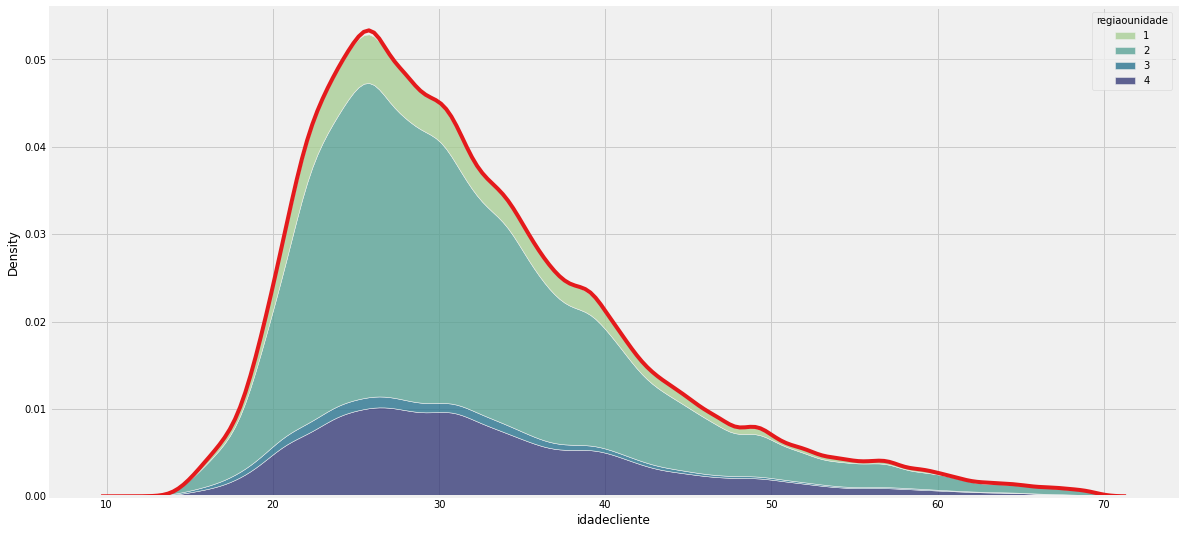

In [60]:
'''f, ax = plt.subplots(figsize=(18, 9))
sns.despine(f)
sns.kdeplot(data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 1)]['idadecliente'])
sns.kdeplot(data_regioes_brasileiras['idadecliente'], shade = False)
plt.show()
'''

plt.figure(figsize = (18,9))
'''sns.kdeplot(data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 1)]['idadecliente'], shade = False, hue =)
sns.kdeplot(data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 2)]['idadecliente'], shade = False)
sns.kdeplot(data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 3)]['idadecliente'], shade = False)
sns.kdeplot(data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 4)]['idadecliente'], shade = False)'''
sns.kdeplot('idadecliente', hue = 'regiaounidade' , data = data_regioes_brasileiras, multiple='stack', palette = 'crest', fill = True)
sns.kdeplot('idadecliente',shade = False, data = data_regioes_brasileiras)

plt.show()

<AxesSubplot:xlabel='idadecliente', ylabel='Density'>

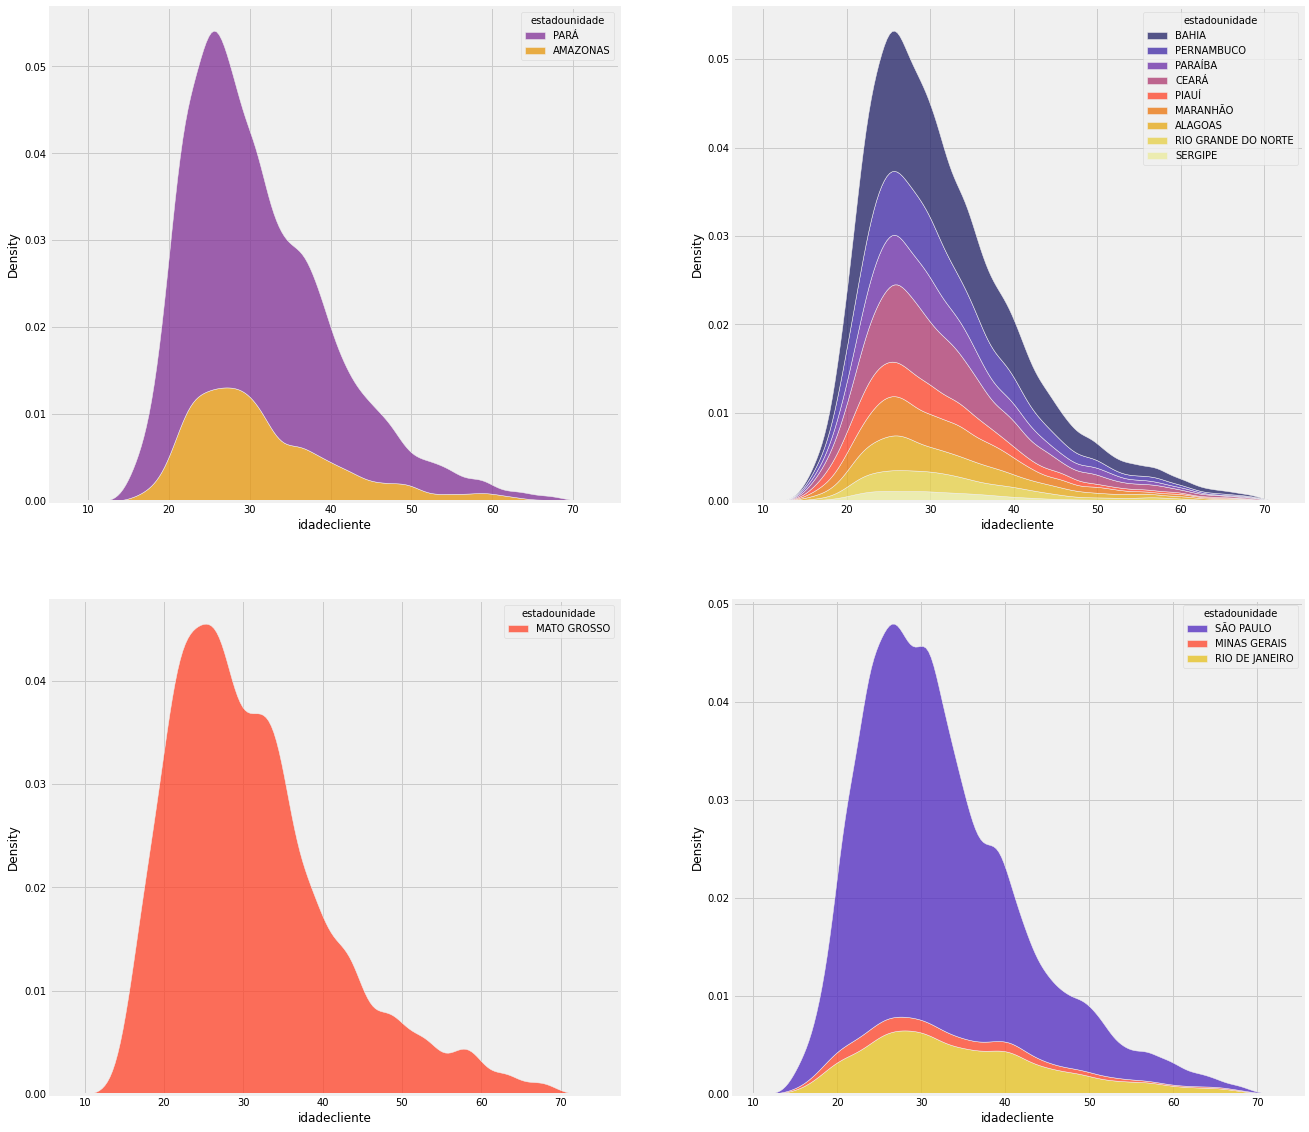

In [77]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.kdeplot('idadecliente', hue = 'estadounidade' , data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 1)], multiple='stack', palette = 'CMRmap', fill = True, ax = ax[0,0])
sns.kdeplot('idadecliente', hue = 'estadounidade' , data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 2)], multiple='stack', palette = 'CMRmap', fill = True, ax = ax[0,1])
sns.kdeplot('idadecliente', hue = 'estadounidade' , data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 3)], multiple='stack', palette = 'CMRmap', fill = True, ax = ax[1,0])
sns.kdeplot('idadecliente', hue = 'estadounidade' , data = data_regioes_brasileiras.loc[(data_regioes_brasileiras.regiaounidade == 4)], multiple='stack', palette = 'CMRmap', fill = True, ax = ax[1,1])


In [55]:
data_regioes_brasileiras.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,estadounidade,mes,regiaounidade
0,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,BAHIA,1,2
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,SÃO PAULO,1,4
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,SÃO PAULO,1,4
3,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,PERNAMBUCO,1,2
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,SÃO PAULO,1,4


In [56]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,datacancelamento,idadecliente,qtdediaspermanencia,mes,regiaounidade,tipocancelamento_COMPULSORIO,tipocancelamento_ESPONTANEO,plano_PLANO SELF LIGHT,plano_PLANO SELF LIGHT SITE,plano_PLANO SELF PLUS,...,cidadeunidade_RIO DE JANEIRO,cidadeunidade_SALVADOR,cidadeunidade_SANTARÉM,cidadeunidade_SOROCABA,cidadeunidade_SÃO JOSÉ DO RIO PRETO,cidadeunidade_SÃO JOSÉ DOS CAMPOS,cidadeunidade_SÃO LUÍS,cidadeunidade_SÃO PAULO,cidadeunidade_TERESINA,cidadeunidade_VITÓRIA DA CONQUISTA
0,2021-01-01,24,120,1,2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2021-01-01,29,105,1,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,29,105,1,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,33,34,1,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,30,333,1,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

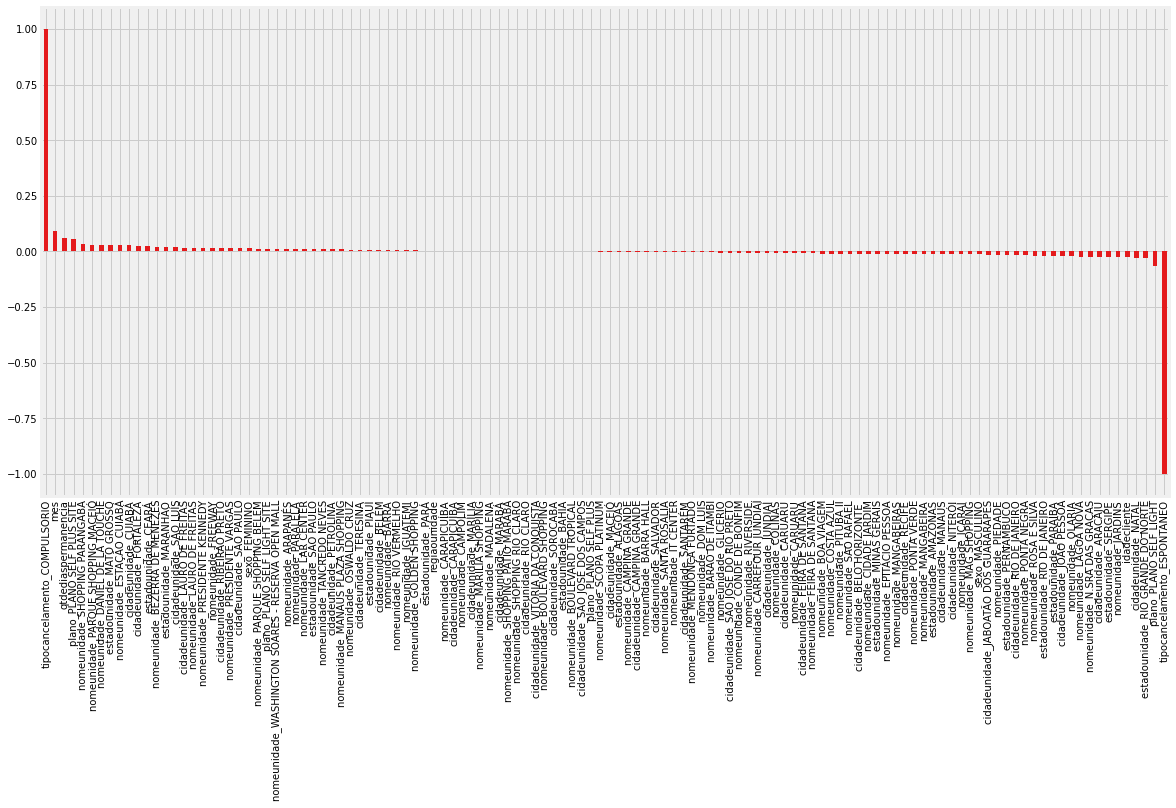

In [57]:
plt.figure(figsize =(18,9))
data_dummies.corr()['tipocancelamento_COMPULSORIO'].sort_values(ascending = False).plot(kind ='bar')

In [58]:
pd.crosstab([data.sexo, data.mes],
            [data.tipocancelamento],
            margins = False).style.background_gradient(cmap = 'viridis')

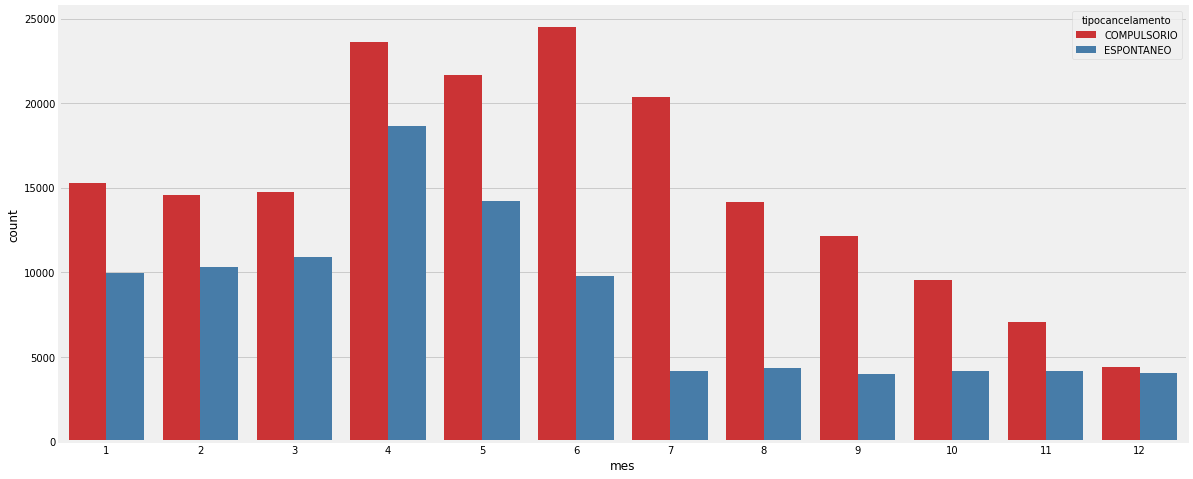

In [59]:
sns.countplot('mes',data = data, hue = 'tipocancelamento')

fig = plt.gcf()
fig.set_size_inches(18,8)